# 1. Importing Libraries #

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# 2. Loading The Data #

In [2]:
train_file = "D:\Professional\Projects\Python\Diabetes Prediction (Females)\diabetes.csv"
X_train = pd.read_csv(train_file)

#### Dataset Description ####
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

# 3. Inspecting The Data #

In [3]:
# Training data inspection
# X_train.head()
print("Shape of the training data: ", X_train.shape)
print("- " * 70)
print(X_train.info())
print("- " * 70)
X_train.describe(include = "all")

Shape of the training data:  (768, 9)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
- - - - - - - - - - - - - - - - - - - - - - - - - - - - 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 4. Data Preprocessing #
- Missing Values
- Calculating The Correlation
- Normalization
---



## 4.1 Missing Values ##

---



In [4]:
# Using isnull()
missing_val_count_by_column_train = (X_train.isnull().sum())
print(missing_val_count_by_column_train[missing_val_count_by_column_train > 0])

Series([], dtype: int64)


<AxesSubplot:>

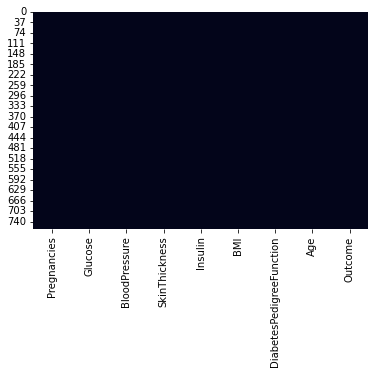

In [5]:
# using sns heatmap 
sns.heatmap(X_train.isnull(), cbar = False)

On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:

- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

In [6]:
diabetes_data_copy = X_train.copy()
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


<AxesSubplot:>

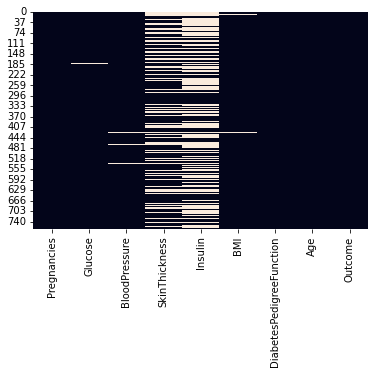

In [7]:
sns.heatmap(diabetes_data_copy.isnull(), cbar = False)

**To fill these Nan values the data distribution needs to be understood**

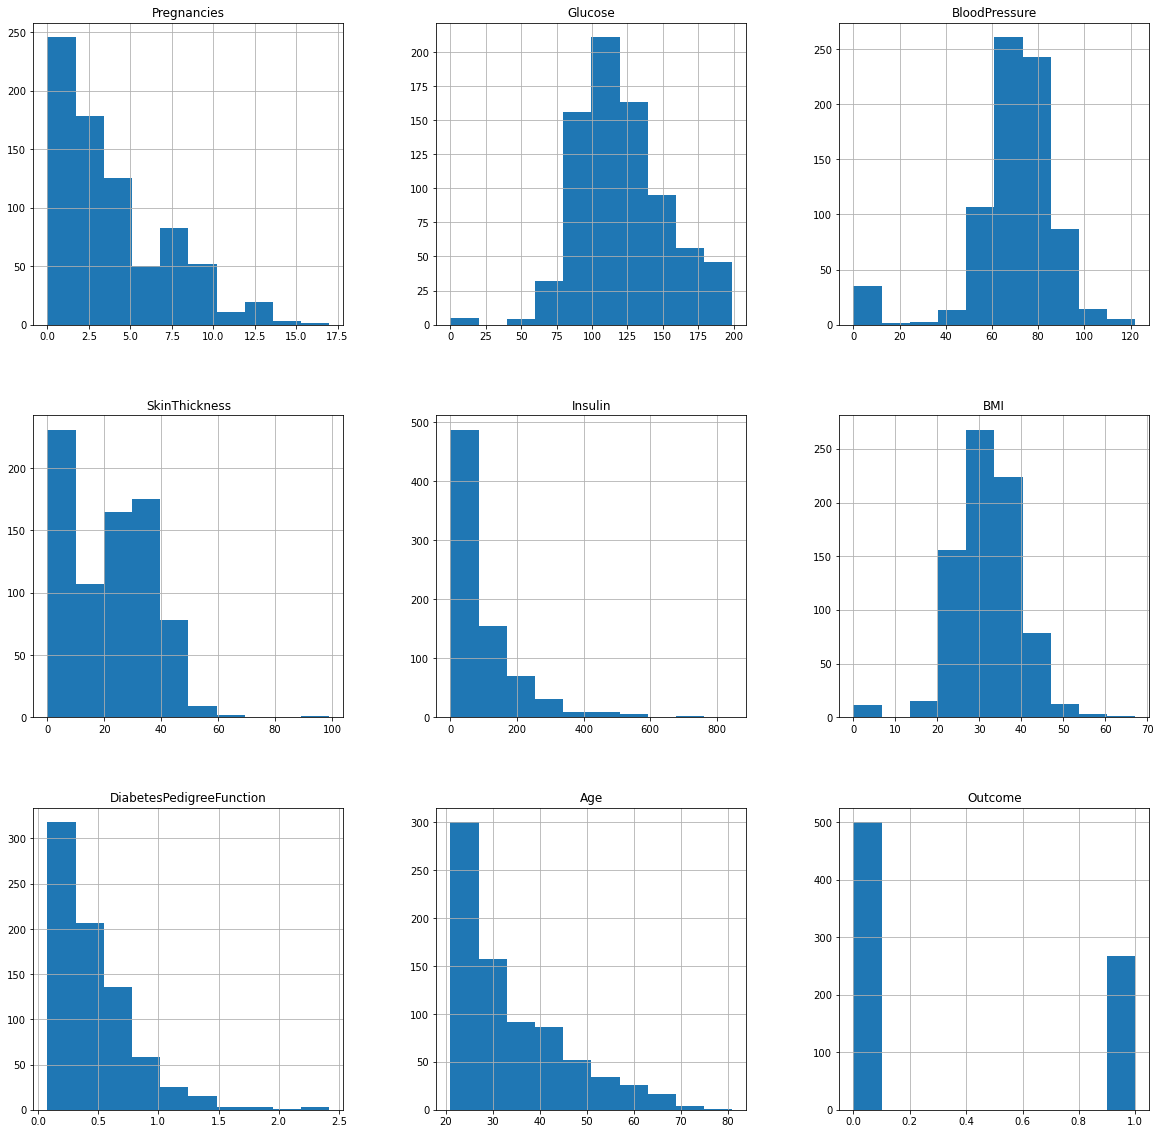

In [8]:
p = X_train.hist(figsize = (20,20))

**Aiming to impute nan values for the columns in accordance with their distribution**


In [9]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

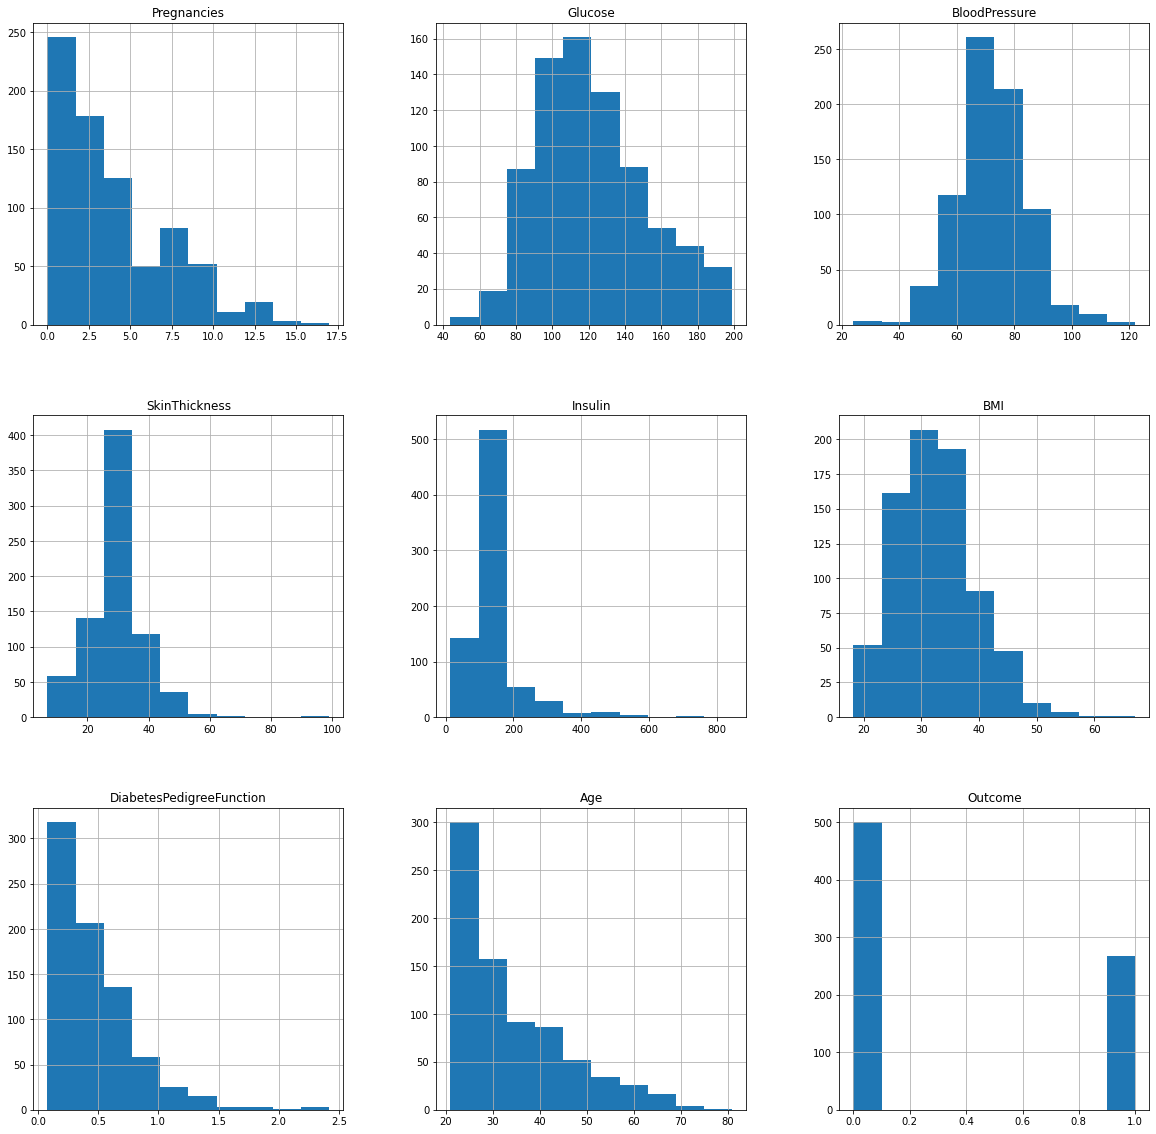

In [10]:
p = diabetes_data_copy.hist(figsize = (20,20))

## 4.2 Finding Pearson's Correlation Coefficient Using A Heatmap ##


---



In [ ]:
plt.figure(figsize=(12,10))
p=sns.heatmap(diabetes_data_copy.corr(), annot=True, cmap ='RdYlGn')

## 4.3 Normalization ##

In [ ]:
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

y = diabetes_data_copy.Outcome

X.head()

# 5. Preparing The Data And Finding The best Value For K #

---



#### Step 1: Splitting The Data ####

In [ ]:
# Split the data into train test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 0)

#### Step 2: Finding K ####

In [ ]:
test_scores = []
train_scores = []

for i in range(1, 27):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))


# score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]

print('Max test score {} % and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_ind))))

#### Step 3: Result Visualisation ####

In [ ]:
plt.figure(figsize=(12, 5))
p = sns.lineplot(range(1, 27), train_scores, marker = '*', label = 'Train Score')
p = sns.lineplot(range(1, 27), test_scores, marker = 'o', label = 'Test Score')

#### Step 5: Building The Final Model ####
Since the best result were found on k = 9, Then we will build the model using this value for k

In [ ]:
knn = KNeighborsClassifier(9)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

In [ ]:
y_pred = knn.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')